In [5]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('student-por.csv', sep = ';')
convert_dict = {'school': str,
                'sex': str,
                'address': str,

                'famsize': str,

                'Pstatus': str,

                'Mjob': str,

                'Fjob': str,
                'reason': str,

                'guardian': str,

                'schoolsup': str,

                'famsup': str,

                'activities': str,

                'nursery': str,

                'higher': str,

                'internet': str,

                'romantic': str,
                
                }
print(df.shape)
df = df.astype(convert_dict)
for col in df.columns:
    #print(df[col].unique())
    print(col)
    #print(df[col].dtype)


df = df.replace(r'^\s*$', np.nan, regex=True)
print(df['famrel'])

(649, 33)
school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3
0      4
1      5
2      4
3      3
4      4
      ..
644    5
645    4
646    1
647    2
648    4
Name: famrel, Length: 649, dtype: int64


In [7]:
import plotly.express as px
corr = df.corr()
#l = px.imshow(corr, text_auto=True)
#l.show()
fig = px.imshow(corr, text_auto=True, aspect="auto", zmin=-1, zmax=1)
fig.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split 

# let's separate the feature matrix X, and target variable y
y = df['G3'] # remember, we want to predict who earns more than 50k or less than 50k
X = df.loc[:, df.columns != 'G3' ] # all other columns are features
X = df.loc[:, df.columns != 'G2' ]


random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

print('training set')
print(X_train.head()) # lots of strings!


training set
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
404     GP   F   17       U     GT3       T     2     1  services     other   
46      GP   F   16       U     LE3       A     3     3     other  services   
261     GP   F   17       R     GT3       T     2     1   at_home  services   
195     GP   M   16       U     GT3       T     3     3  services     other   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... romantic famrel  freetime  goout  Dalc Walc health absences  G1  G3  
404  ...       no      4         3      5     2    4      4        4  12  16  
46   ...       no      2         3      5     1    4      3        6  13  13  
261  ...       no      2         1      1     1    1      3        2  13  13  
195  ...      yes      4         2      3     1    2      3        0  11  13  
648  ...       no      4         4      1     3    4      5        4  10  11  

[5 rows x 32 columns]


In [9]:
# collect which encoder to use on each feature
# needs to be done manually
#ordinal_ftrs = ['education'] 
#ordinal_cats = [[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',\
#                ' Some-college',' Assoc-voc',' Assoc-acdm',' Bachelors',' Masters',' Prof-school',' Doctorate']]
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
onehot_ftrs = ['school','sex', 'address','famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup','paid','activities', 'nursery', 'higher', 'internet' , 'romantic']
ordinal_fts = ['Medu',  'Fedu', 'famrel', 'freetime', 'goout' ,'Dalc', 'Walc', 'health']
minmax_ftrs = ['age', 'failures', 'studytime', 'traveltime', 'absences']
std_ftrs = ['G1']

for col in X_train.columns:
    print(col)# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        #('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=True,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here
    
X_t = clf.fit_transform(X)


# X_train_prep = clf.fit_transform(X_train)
# X_val_prep = clf.transform(X_val)
# X_test_prep = clf.transform(X_test)

# print(X_train.shape)
# print(X_train_prep.shape)
# print(X_train_prep)





school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G3


[0.04700516 0.04700516 0.00992924 0.00992924 0.01697916 0.01697916
 0.00514773 0.00514773 0.00174193 0.00174193 0.01990841 0.00637814
 0.00652695 0.00859983 0.01216081 0.00705627 0.00789962 0.00906879
 0.00906248 0.01231854 0.01317591 0.0126359  0.01351477 0.01379633
 0.00797294 0.00627058 0.00671295 0.01105566 0.01105566 0.0087937
 0.0087937  0.00631092 0.00631092 0.00979767 0.00979767 0.00725671
 0.00725671 0.05591259 0.05591259 0.01113669 0.01113669 0.00764571
 0.00764571 0.02843561 0.09415263 0.02631741 0.01679308 0.02377029
 1.        ]
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G3']
[2.04380336e-02 7.24339239e-02 0.00000000e+00 6.91422270e-02
 2.53516541e-02 2.98570319e-02 2.50697175e-02 1.48163344e-03
 2.37366

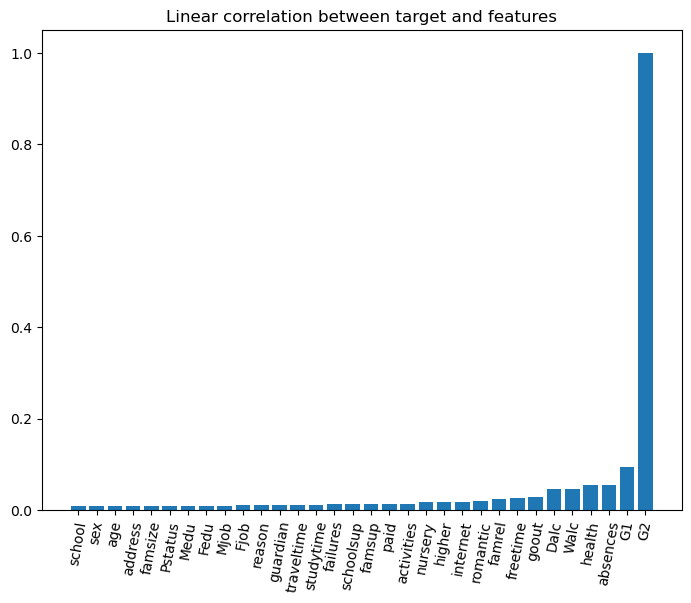

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, mutual_info_classif

import scipy
from scipy.sparse import csr_matrix

#csr_matrix = csr_matrix(X_train.astype(pd.SparseDtype("float64", 0)).sparse.to_coo())

f_test, pval = f_classif(X_t, df['G3'])
f_test /= np.max(f_test)
print(f_test)
print(list(X_train))

mi = mutual_info_classif(X_t, df['G3'])
print(mi)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
n=32
x_labels = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
y_values = f_test
y_values.sort()
y_values_five = y_values[-n:]
ax.bar(x_labels,y_values_five)
plt.title('Linear correlation between target and features')
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees


plt.show()





[0.11646066 0.15293228 0.09101708 0.11239484 0.04590261 0.09548045
 0.05099516 0.00738129 0.         0.16910132 0.02916501 0.00491093
 0.01749897 0.         0.         0.03883766 0.00818485 0.07065815
 0.09305829 0.04666469 0.02796956 0.01728086 0.01386961 0.04338494
 0.01149321 0.12631963 0.01499778 0.25223196 0.         0.
 0.13650419 0.31054688 0.01235391 0.0088027  0.09554638 0.
 0.18613784 0.         0.12226161 0.02323179 0.12877521 0.13125422
 0.00324849 0.06788213 0.         0.08012511 0.         2.03278381
 0.037761  ]


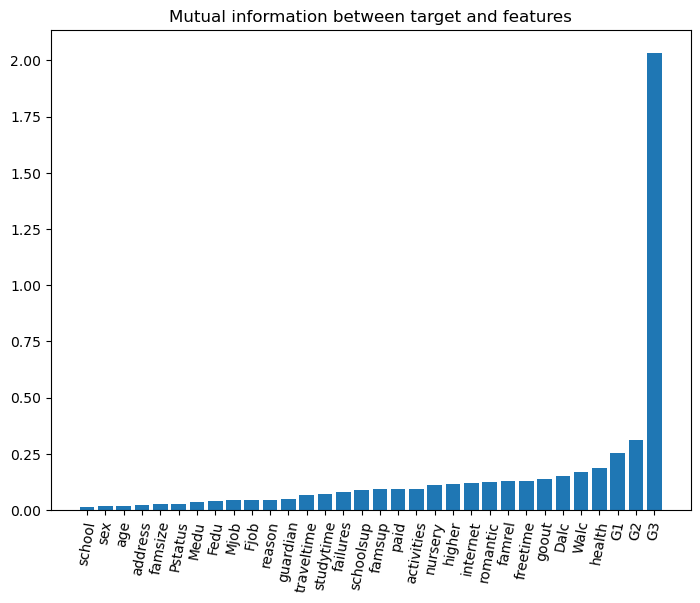

In [11]:
mi = mutual_info_classif(X_t, df['absences'], random_state=42)
print(mi)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
n=32
x_labels = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2', 'G3']
y_values = mi
y_values.sort()
y_values_five = y_values[-n:]
ax.bar(x_labels,y_values_five)
plt.title('Mutual information between target and features')
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees

plt.show()

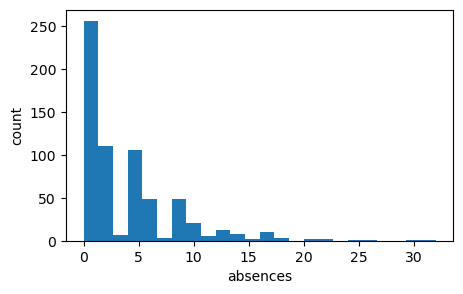

In [12]:
plt.figure(figsize=(5,3))

df['absences'].plot.hist(bins = df['absences'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('absences')
plt.ylabel('count')
plt.show()

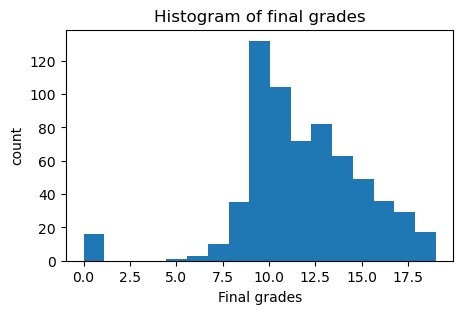

In [13]:
plt.figure(figsize=(5,3))

df['G3'].plot.hist(bins = df['G3'].nunique())   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
plt.xlabel('Final grades')
plt.ylabel('count')
plt.title('Histogram of final grades')
plt.show()

In [ ]:
#####'#################'
#PART TWO: POST-EDA



#####################

In [14]:
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from  sklearn.linear_model import Lasso
from  sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



y = df['G3'] # target
X = df.loc[:, df.columns != 'G3'] # all other columns are features
X.drop(columns=['G2'])


#ordinal_ftrs = ['education'] 
#ordinal_cats = [[' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',\
#                ' Some-college',' Assoc-voc',' Assoc-acdm',' Bachelors',' Masters',' Prof-school',' Doctorate']]
onehot_ftrs = ['school','sex', 'address','famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup','paid','activities', 'nursery', 'higher', 'internet' , 'romantic']
minmax_ftrs = ['age', 'failures', 'studytime', 'traveltime', 'absences', 'Medu',  'Fedu', 'famrel', 'freetime', 'goout' ,'Dalc', 'Walc', 'health']
#ordinal_ftrs = ['Medu',  'Fedu', 'famrel', 'freetime', 'goout' ,'Dalc', 'Walc', 'health']
std_ftrs = ['G1']
# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        #('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])
param_grid_rf = {
                'randomforestregressor__max_depth': [1, 3, 10, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
                'randomforestregressor__max_features': [0.5,0.75,1.0] # linearly spaced between 0.5 and 1
                } 
rf = RandomForestRegressor(random_state = 42) # initialize the classifier

param_grid_svr = {
                'svr__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
                'svr__C': [1e-1, 1e0, 1e1]
                 }

svr = SVR()

param_grid_knn = {
                'kneighborsregressor__n_neighbors': [1, 3, 10, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
                 }

knn = neighbors.KNeighborsRegressor(weights='uniform')

param_grid_lasso = {
                'lasso__alpha':np.logspace(-7,0,29)
                } 
lin_reg_lasso = Lasso(max_iter=100000000)

param_grid_ridge = {
                'ridge__alpha':np.logspace(-7,0,29)
                } 
lin_reg_ridge = Ridge()

param_grid_elastic = {
                'elasticnet__alpha':[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
                'elasticnet__l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
                'elasticnet__max_iter': [100000]
                } 
elastic = ElasticNet(random_state=0)


# all the same up to this point

In [17]:
# read in the data and add your function in this cell
def MLpipe_KFold_RMSE(X, y, preprocessor, param_grid, MLalgo): 
    ''' This function splits the data to other/test (80/20) 
        and then applies KFold with 4 folds to other. 
        The RMSE is minimized in cross-validation. '''
        
    test_scores = []
    best_models = []
    r2scores=[]
    
        # add your code below
    # we will use GridSearchCV and the parameter names need to contain the ML algorithm you want to use
    # the parameters of some ML algorithms have the same name and this is how we avoid confusion

    nr_states = 10
    test_scores = np.zeros(nr_states)
    r2scores = np.zeros(nr_states)
    final_models = []
    y_t =np.array([[]])
    y_t_p = np.array([[]])

    for i in range(nr_states):
        # first split to separate out the test set
        # we will use kfold on other
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

        # splitter for other
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)

        # the classifier

        pipe = make_pipeline(preprocessor,MLalgo)

        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'neg_root_mean_squared_error',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)

        # this line actually fits the model on other
        grid.fit(X_other, y_other)
        # save results into a data frame. feel free to print it and inspect it
        results = pd.DataFrame(grid.cv_results_)
        #print(results)
        
        print('best model parameters:',grid.best_params_)
        print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
        # save the model
        final_models.append(grid)
        # calculate and save the test score
        y_test_pred = final_models[-1].predict(X_test)
        print(type(y_test_pred))
        y_t_p = np.concatenate((y_t_p, y_test_pred), axis=None)
        y_t = np.concatenate((y_t, y_test), axis=None)
        test_scores[i] = mean_squared_error(y_test,y_test_pred, squared=False)
        r2scores[i] = r2_score(y_test,y_test_pred)

        print('test score:',test_scores[i])
    print('average test score is', np.average(test_scores))
    print('test score standard deviation is', np.std(test_scores))
    
    print('average r2 score is', np.average(r2scores))
    print('r2 score standard deviation is', np.std(r2scores))


        
    return best_models, test_scores, r2scores, y_t_p, y_t



In [18]:
# run l1 regularized linear regression to test your function in this cell
##BEST MODEL RESULTS:

best_models, test_scores, r2scores, y_t_p, y_t = MLpipe_KFold_RMSE(X, y, preprocessor, param_grid_lasso, lin_reg_lasso)

Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'lasso__alpha': 0.1}
validation score: -1.9061689213361084
<class 'numpy.ndarray'>
test score: 1.458968478977559
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'lasso__alpha': 0.05623413251903491}
validation score: -1.836524501389573
<class 'numpy.ndarray'>
test score: 1.714528438741337
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'lasso__alpha': 0.05623413251903491}
validation score: -1.8375397788399834
<class 'numpy.ndarray'>
test score: 1.6777866894294715
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'lasso__alpha': 0.01778279410038923}
validation score: -1.7833682297314744
<class 'numpy.ndarray'>
test score: 1.999944522121648
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'lasso__alpha': 0.1}
validation score: -1.7867297366296937
<class 'num

In [19]:
mean_scores = np.ones(len(y_t))* np.mean(y_t)
print('the baseline RMSE:',mean_squared_error(mean_scores,y_t, squared=False))
from sklearn.metrics import r2_score

print('the baseline R2:',r2_score(mean_scores,y_t))

the baseline RMSE: 3.2561842845076434
the baseline R2: 0.0


Text(0.5, 1.0, ' Predicted vs. True value')

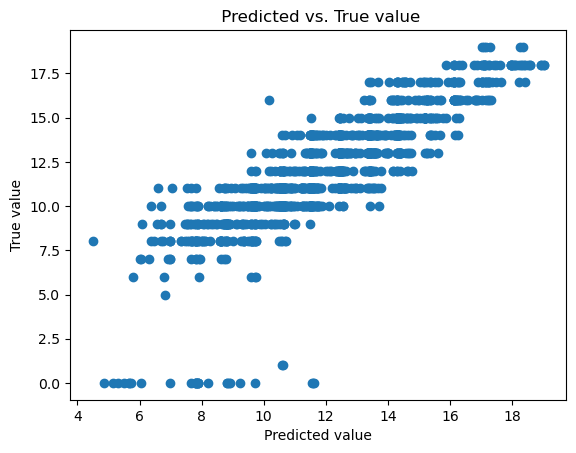

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(y_t_p, y_t)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title(' Predicted vs. True value')

In [21]:
#- linear regression with l2 regularization 
best_models, test_scores,r2scores, _, _ = MLpipe_KFold_RMSE(X, y, preprocessor, param_grid_ridge, lin_reg_ridge)

Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'ridge__alpha': 1.0}
validation score: -1.9664928546001712
<class 'numpy.ndarray'>
test score: 1.4364627581339429
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'ridge__alpha': 1.0}
validation score: -1.8980376372657535
<class 'numpy.ndarray'>
test score: 1.7814742083631312
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'ridge__alpha': 1.0}
validation score: -1.9323984313626035
<class 'numpy.ndarray'>
test score: 1.7125715431995665
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'ridge__alpha': 1.0}
validation score: -1.8152364205514597
<class 'numpy.ndarray'>
test score: 2.0712859523468734
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'ridge__alpha': 1.0}
validation score: -1.8594746595087093
<class 'numpy.ndarray'>
test score: 1.985021730404036
F

In [22]:
# Elastic net
best_models, test_scores,r2scores, _, _ = MLpipe_KFold_RMSE(X, y, preprocessor, param_grid_elastic, elastic)

Fitting 4 folds for each of 35 candidates, totalling 140 fits
best model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9, 'elasticnet__max_iter': 100000}
validation score: -1.9081174169889228
<class 'numpy.ndarray'>
test score: 1.4570102757660217
Fitting 4 folds for each of 35 candidates, totalling 140 fits
best model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.75, 'elasticnet__max_iter': 100000}
validation score: -1.8375859778997041
<class 'numpy.ndarray'>
test score: 1.7010510993238617
Fitting 4 folds for each of 35 candidates, totalling 140 fits
best model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9, 'elasticnet__max_iter': 100000}
validation score: -1.8411672177646567
<class 'numpy.ndarray'>
test score: 1.673230556377174
Fitting 4 folds for each of 35 candidates, totalling 140 fits
best model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.1, 'elasticnet__max_iter': 100000}
validation score: -1.78790428

In [23]:
#RF
best_models, test_scores,r2scores, _, _ = MLpipe_KFold_RMSE(X, y, preprocessor, param_grid_rf, rf)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestregressor__max_depth': 3, 'randomforestregressor__max_features': 1.0}
validation score: -1.767223897144068
<class 'numpy.ndarray'>
test score: 1.5825289926385113
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestregressor__max_depth': 3, 'randomforestregressor__max_features': 1.0}
validation score: -1.7096726060971665
<class 'numpy.ndarray'>
test score: 1.7619832925840686
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestregressor__max_depth': 3, 'randomforestregressor__max_features': 1.0}
validation score: -1.7342972540609665
<class 'numpy.ndarray'>
test score: 1.7479247876291866
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
validation score: -1.7636308315780194
<class 'num

In [24]:
#KNN
best_models, test_scores,r2scores, _, _ = MLpipe_KFold_RMSE(X, y, preprocessor, param_grid_knn, knn)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'kneighborsregressor__n_neighbors': 10}
validation score: -2.2766536543337628
<class 'numpy.ndarray'>
test score: 1.7041803804852258
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'kneighborsregressor__n_neighbors': 30}
validation score: -2.1865020525536982
<class 'numpy.ndarray'>
test score: 2.0256074323731807
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'kneighborsregressor__n_neighbors': 30}
validation score: -2.1959524121369833
<class 'numpy.ndarray'>
test score: 2.014797820231662
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'kneighborsregressor__n_neighbors': 30}
validation score: -2.137068064307589
<class 'numpy.ndarray'>
test score: 2.4465901615929506
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'kneighborsregressor__n_neighbors': 30}
validation

In [25]:
#SVR
best_models, test_scores,r2scores, _, _ = MLpipe_KFold_RMSE(X, y, preprocessor, param_grid_svr, svr)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svr__C': 10.0, 'svr__gamma': 0.001}
validation score: -1.9898823228678668
<class 'numpy.ndarray'>
test score: 1.463542091329733
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svr__C': 10.0, 'svr__gamma': 0.001}
validation score: -1.9173577622489084
<class 'numpy.ndarray'>
test score: 1.7377675483823563
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svr__C': 10.0, 'svr__gamma': 0.1}
validation score: -1.9020258087045248
<class 'numpy.ndarray'>
test score: 1.9140479342160757
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svr__C': 10.0, 'svr__gamma': 0.001}
validation score: -1.8450692006527887
<class 'numpy.ndarray'>
test score: 2.1193326187400054
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svr__C': 10.0, 'svr__gamma': 0.001}
validation score: -1.

## Among these models, we can choose the one that performed the best to generate predictions for each student : y_test_pred

In [ ]:

import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
booster = XGB.get_booster()
explainer = shap.TreeExplainer(booster)

# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(df_train[:1000])
print(np.shape(shap_values))

In [ ]:
shap.summary_plot(shap_values, df_train[:1000],feature_names = feature_names)
# index = 42 # the index of the point to explain
# print(explainer.expected_value[0]) # we explain class 0 predictions
# shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

In [ ]:
index = 0 # the index of the point to explain
print(explainer.expected_value) # we explain class 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], features = df_test.iloc[index,:],feature_names = feature_names)

Results slide(s) (10 points)
Describe the test scores of each algorithm you tried. How do your scores compare to a simple baseline model? Inspect your model (e.g., confusion matrix, scatter plot of the true vs predicted values in regression, global/local feature importances).

Outlook slide(s) (2 points)
Describe what else you could try to improve either the predictive power or the interpretability of your model given more time.
